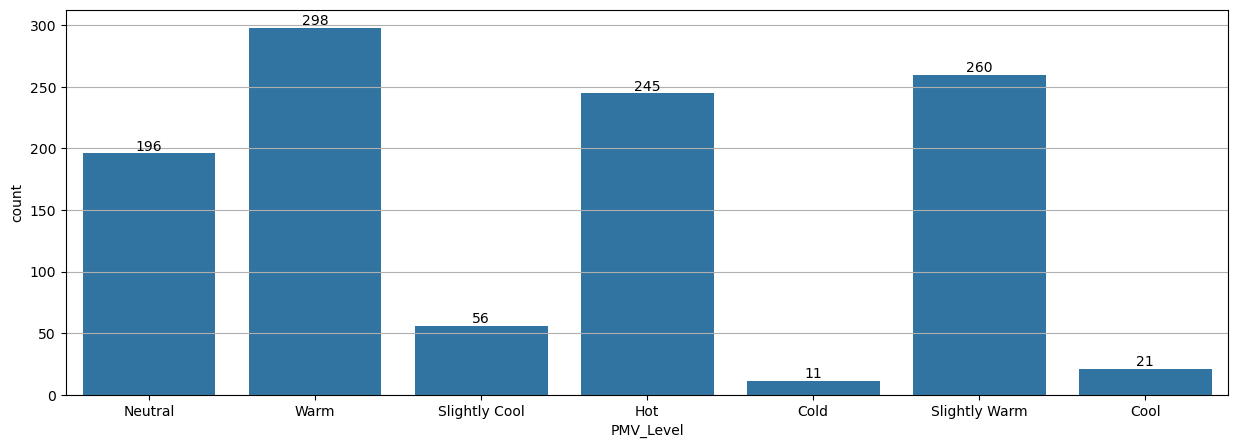

Accuracy: 0.9871794871794872


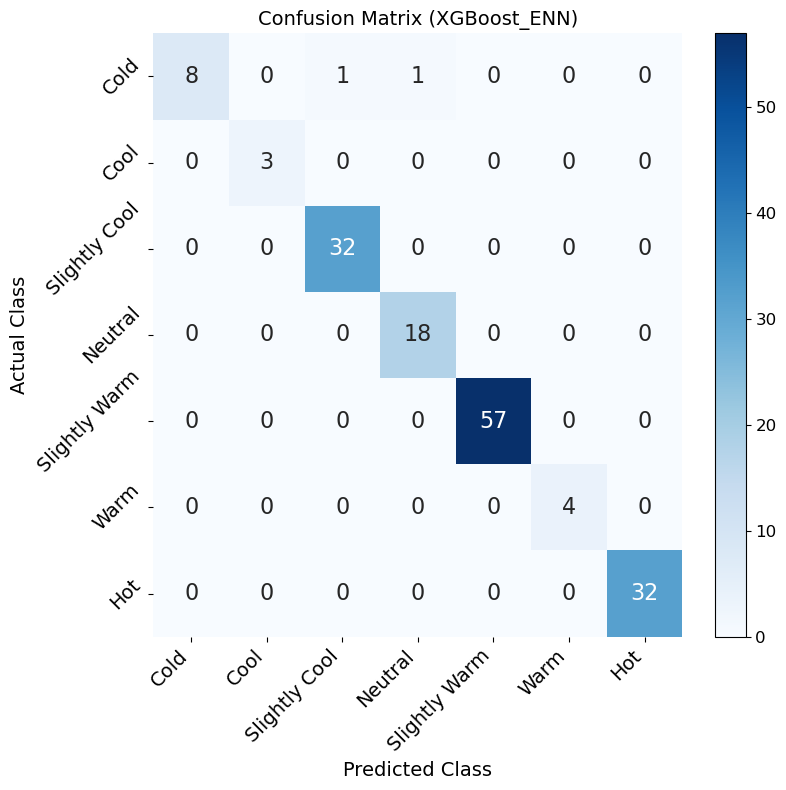

In [5]:
import pandas as pd
import numpy as np         
import matplotlib.pyplot as plt   
import seaborn as sns 
from xgboost import XGBClassifier 
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score, confusion_matrix

# Read the CSV file into a DataFrame
df = pd.read_csv("IUBAT_Testing7.csv")

# Visualize the distribution of 'PMV_Level' column
plt.figure(figsize=(15,5))
plt.grid()
ax = sns.countplot(data=df, x='PMV_Level')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

# Preprocess categorical variables
df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Define class names
class_names = ['Hot', 'Warm', 'Slightly Warm', 'Neutral', 'Slightly Cool', 'Cool', 'Cold']

# Separate input features and target variable
inputs = df.drop(['PMV_Level'], axis=1)
target = df['PMV_Level']

# Balance the dataset using SMOTEENN
resample = SMOTEENN(random_state=0)
X, y = resample.fit_resample(inputs, target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

# Create and train the Random Forest Classifier model
rfc = XGBClassifier()
rfc.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names[::-1], yticklabels=class_names[::-1], annot_kws={"fontsize": 14})

# Increase font size for annotations
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14, rotation=45)  # Rotate y-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14, rotation=45, ha='right')  # Rotate x-axis labels and align them to the right

plt.title('Confusion Matrix (XGBoost_ENN)', fontsize=14)  # Increase title font size
plt.xlabel('Predicted Class', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Actual Class', fontsize=14)  # Increase y-axis label font size

# Increase font size for the values inside each class
for text in heatmap.texts:
    text.set_fontsize(16)

# Remove the duplicate colorbar
plt.gcf().get_axes()[1].remove()

# Create a separate colorbar figure and adjust its position
cbar = plt.colorbar(heatmap.collections[0])
cbar.ax.tick_params(labelsize=12)  # Increase colorbar tick font size

plt.tight_layout()
plt.show()

In [6]:
from sklearn.metrics import classification_report

# ...

# Evaluate the model on the testing set
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix in text form
print("Confusion Matrix:")
print(cm)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.9871794871794872
Confusion Matrix:
[[ 8  0  1  1  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0 32  0  0  0  0]
 [ 0  0  0 18  0  0  0]
 [ 0  0  0  0 57  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0 32]]
Classification Report:
               precision    recall  f1-score   support

          Hot       1.00      0.80      0.89        10
         Warm       1.00      1.00      1.00         3
Slightly Warm       0.97      1.00      0.98        32
      Neutral       0.95      1.00      0.97        18
Slightly Cool       1.00      1.00      1.00        57
         Cool       1.00      1.00      1.00         4
         Cold       1.00      1.00      1.00        32

     accuracy                           0.99       156
    macro avg       0.99      0.97      0.98       156
 weighted avg       0.99      0.99      0.99       156

